In [45]:
!cd ../ && mvn clean install

[INFO] Scanning for projects...
[INFO] 
[INFO] -------------< org.example:ComputationalGeometryProjectV2 >-------------
[INFO] Building ComputationalGeometryProjectV2 1.0-SNAPSHOT
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-clean-plugin:2.5:clean (default-clean) @ ComputationalGeometryProjectV2 ---
[INFO] Deleting C:\Users\Александр\Desktop\ComputationalGeometryProjectV2\target
[INFO] 
[INFO] --- maven-resources-plugin:2.6:resources (default-resources) @ ComputationalGeometryProjectV2 ---
[WARNING] Using platform encoding (Cp1251 actually) to copy filtered resources, i.e. build is platform dependent!
[INFO] Copying 0 resource
[INFO] 
[INFO] --- maven-compiler-plugin:3.1:compile (default-compile) @ ComputationalGeometryProjectV2 ---
[INFO] Changes detected - recompiling the module!
[WARNING] File encoding has not been set, using platform encoding Cp1251, i.e. build is platform dependent!
[INFO] Compiling 5 source files to C:\U

In [64]:
from random import random,randint
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

width = 3000000
height = 4000000
points_count=50
fname="points.txt"

filename="../python/"+fname
outputfile="../python/triangulation.txt"

points = []
triangles = []

def generateRandomPoints():
    global points,points_count,width,height,fname;
    points = [[randint(1,width-1),randint(1,height-1)] for x in range(points_count)]
    with open(fname,"w+") as f:
        for p in points:
            f.write(" ".join(map(lambda x: "%.3f"%x,p)));
            f.write("\n")

def runTriangulationAlgorithm():
    global filename,outputfile;
    global points,points_count,width,height,fname;
    cmd="cd ../target/ && java -jar triangulation.jar %d %d %s %s"%(width,height,filename,outputfile)
    #print(cmd)
    assert os.system(cmd)==0


def parseTriangles():
    global triangles;
    triangles = []

    with open(outputfile,"r") as f:
        for line in f.readlines():
            t = list(map(float,line.split()))
            triangle = [
                [t[1],t[0]],
                [t[3],t[2]],
                [t[5],t[4]]
            ]
            triangles.append(triangle)

def drawTriangulation():
    global points,points_count,width,height,fname;
    global triangles;
    triangles = np.array(triangles,dtype=float);
    fig, ax = plt.subplots(1,1,figsize=(30,20));
    for t in triangles:
        polygon = Polygon(t,edgecolor="red",facecolor="none")
        ax.add_patch(polygon)
        plt.scatter(t[:,0],t[:,1],s=20,color="blue")
    plt.ylim(0,height)
    plt.xlim(0,width)
    plt.show()

def processEverything():
    generateRandomPoints()
    runTriangulationAlgorithm()
    parseTriangles()
    drawTriangulation()

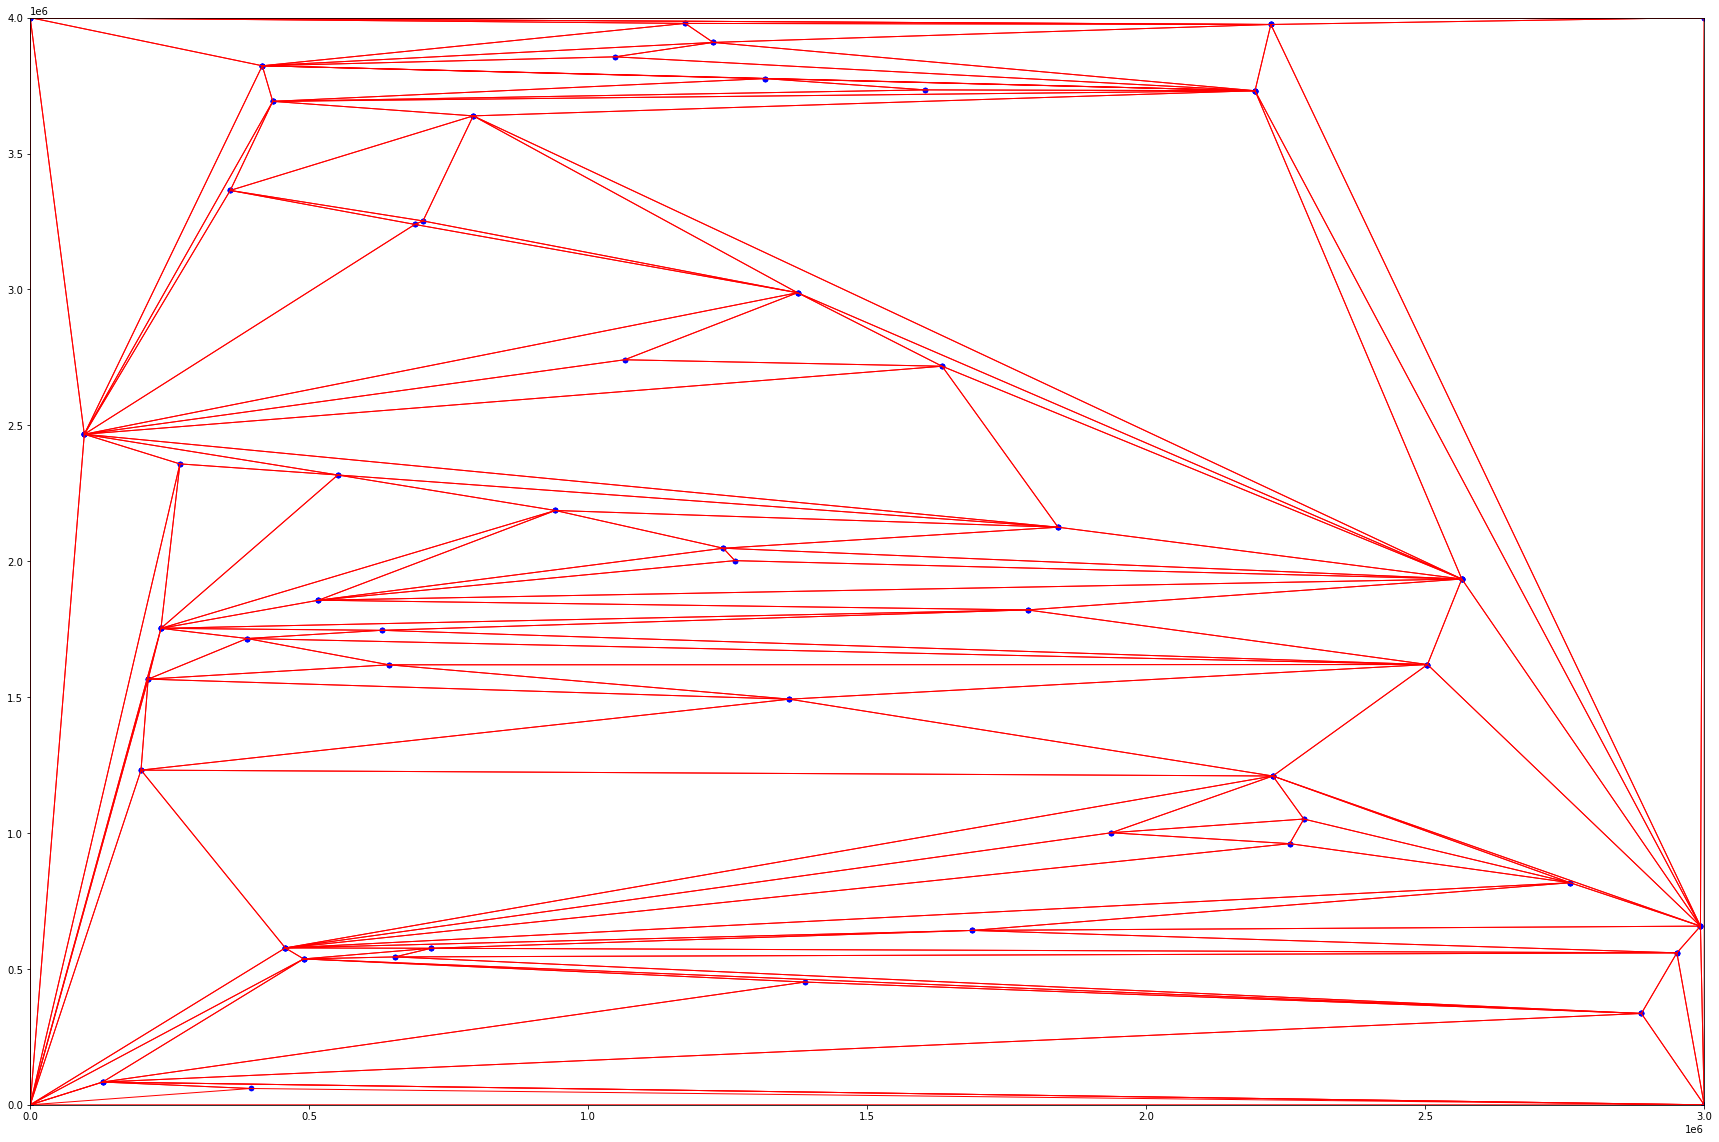

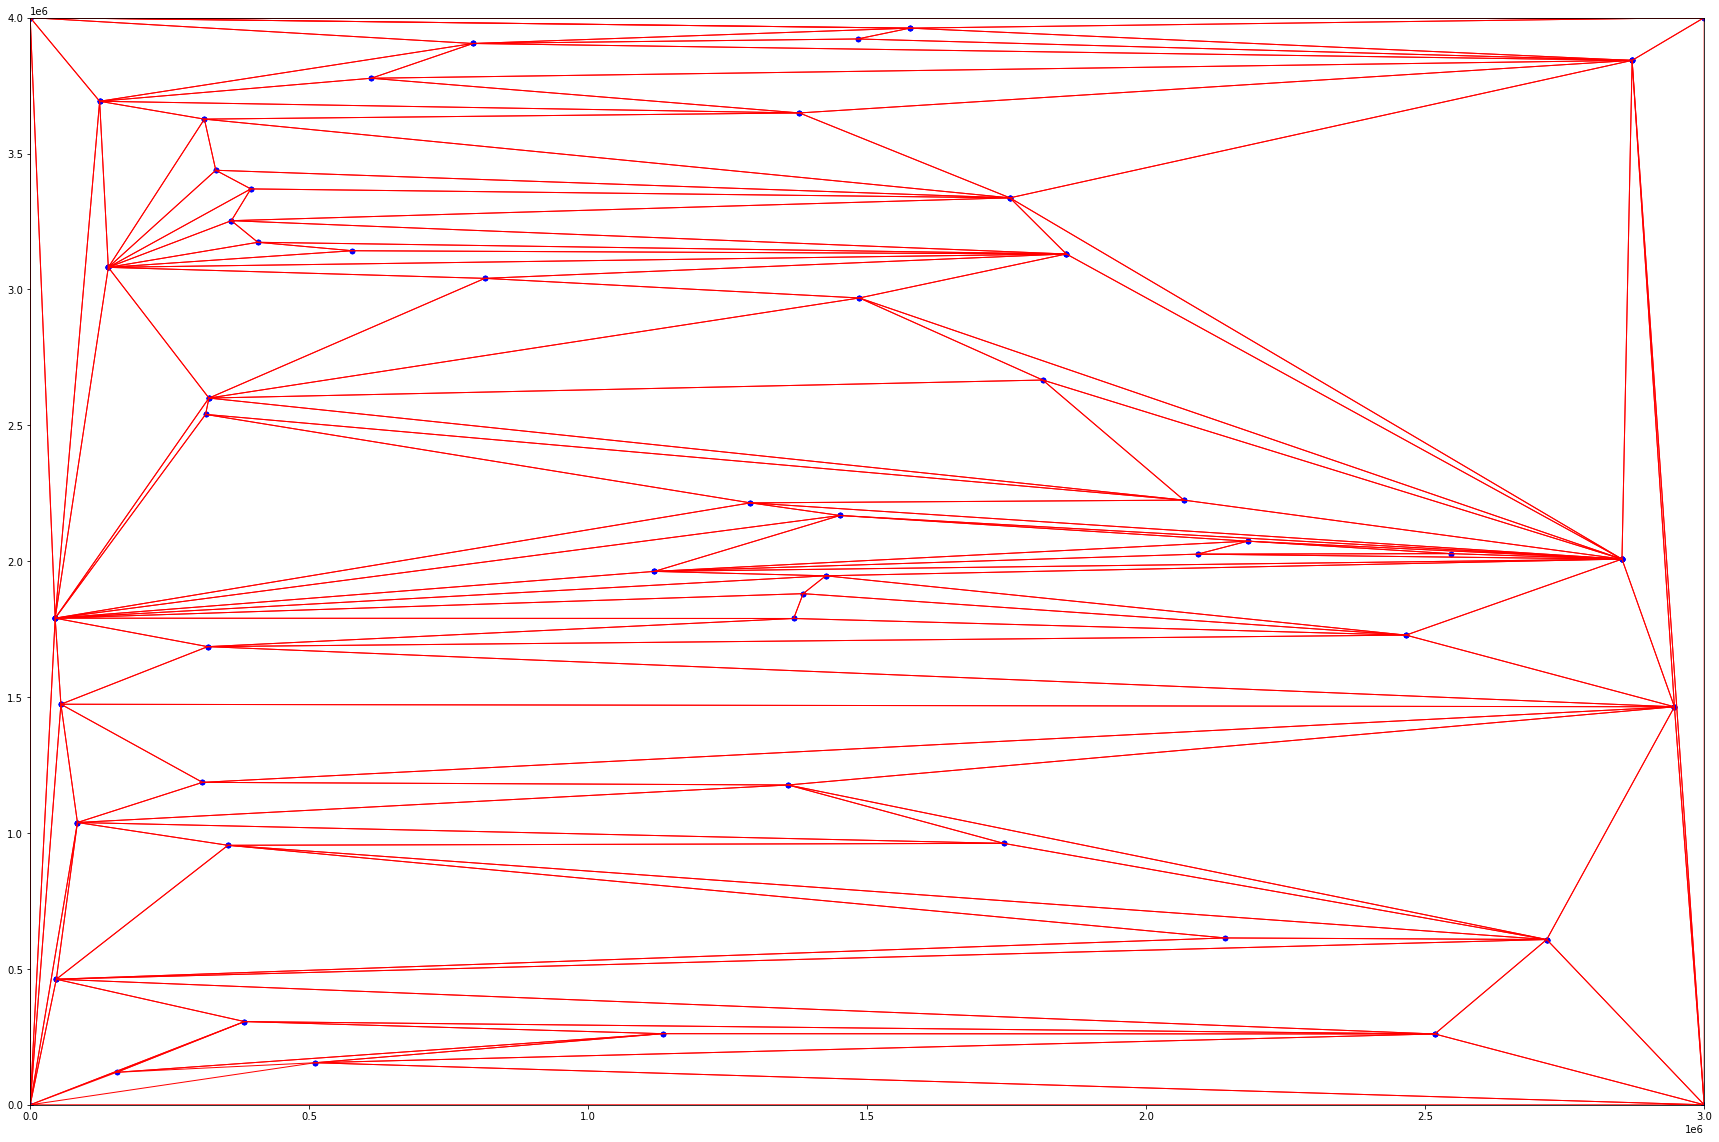

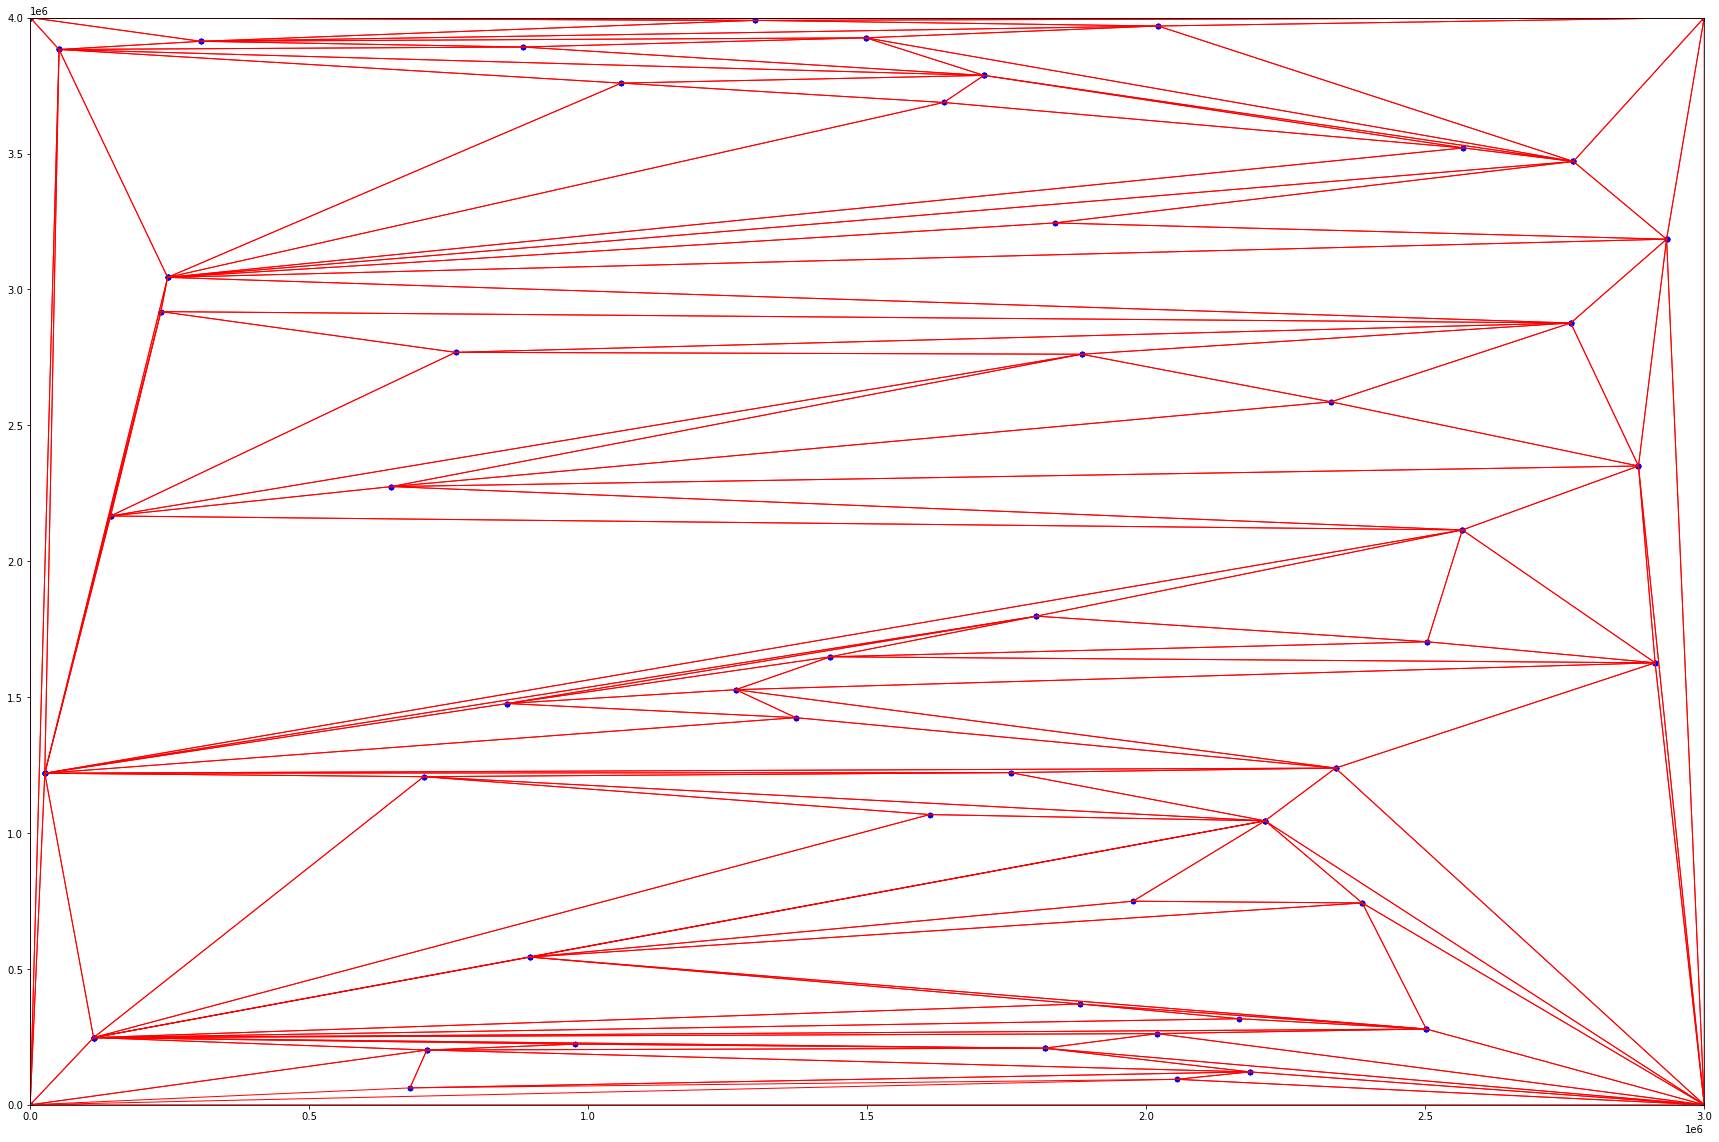

In [65]:
for i in range(3):
    processEverything()

In [39]:
!cd ../target/ && java -jar triangulation.jar 3000000 4000000 ../python/points.txt ../python/triangulation.txt true

add: Point2D{x=1334195.0, y=267936.0}
v3: Point2D{x=1334195.0, y=-3732064.0}


78.64477694865816
-83.95839812354342
Point2D{x=2781269.0, y=114780.0}
added


-83.95839812354342
-80.86253644975596
Point2D{x=3000000.0, y=0.0}
added
hull: [Point2D{x=0.0, y=0.0}, Point2D{x=2781269.0, y=114780.0}, Point2D{x=3000000.0, y=0.0}]
updated convex hull: [Point2D{x=0.0, y=0.0}, Point2D{x=1334195.0, y=267936.0}, Point2D{x=2781269.0, y=114780.0}, Point2D{x=3000000.0, y=0.0}]



add: Point2D{x=2261930.0, y=774054.0}
v3: Point2D{x=2261930.0, y=-3225946.0}


71.10856472421368
61.385698055868126
Point2D{x=1334195.0, y=267936.0}
removed


71.10856472421368
-38.229052540920065
Point2D{x=2781269.0, y=114780.0}
added


-38.229052540920065
-43.63679018501824
Point2D{x=3000000.0, y=0.0}
removed
hull: [Point2D{x=0.0, y=0.0}, Point2D{x=1334195.0, y=267936.0}, Point2D{x=2781269.0, y=114780.0}, Point2D{x=3000000.0, y=0.0}]
updated convex hull: [Point2D{x=0.0, y=0.0}, Point2D{x=2261930.0, y=774054.0}, Point2D{x=3000